
The objective of this task is to analyse different vegetation indices in the region of Mosul, Iraq. Sentinel-2 data is used for the analysis. The period of study is from 2016 to 2021. This notebook is used to create the required indices
for all the satellite images. 

In [ ]:
!pip install rasterio

In [ ]:
import rasterio as rio
import matplotlib.pyplot as plt
from rasterio.plot import show
import numpy as np

In [ ]:
# Mount Google drive.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#all the files should be placed in the correct folder
path = '/content/drive/My Drive/Mosul/Sentinel_2/'
import sys 
sys.path.insert(0, path)
%cd /content/drive/My Drive/Mosul//Sentinel_2/
%pwd

/content/drive/My Drive/Mosul/Sentinel_2


'/content/drive/My Drive/Mosul/Sentinel_2'

In [ ]:
data= rio.open('sentinel2_2016.tif')
data.count

5

In [ ]:
data.shape

(8266, 12965)

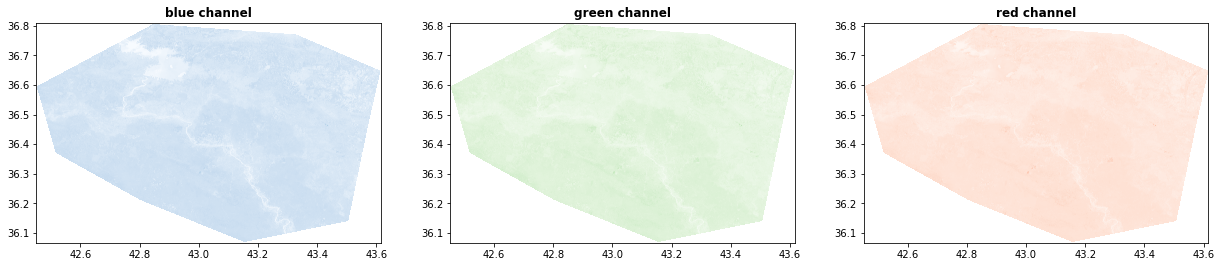

In [ ]:
fig, (axr, axg, axb) = plt.subplots(1,3, figsize=(21,7))
show((data, 1), ax=axr, cmap='Blues', title='blue channel')
show((data, 2), ax=axg, cmap='Greens', title='green channel')
show((data, 3), ax=axb, cmap='Reds', title='red channel')
plt.show()

**Calculate Vegetation Indices**



1.   NDVI = (NIR - Red)/(NIR + Red)
2.   NDWI = (Green - NIR)/(Green + NIR)
3.   NDBI = (SWIR - NIR)/(SWIR + NIR)
4.   SAVI =  (1+L) * (NIR - Red) / (NIR + Red + L)


In [ ]:
import os
def create_index_raster(path):
  '''
  This function is used to create raster files with indices for all the files in the path. The raster files have 4 bands.
  Band1: NDVI
  Band2: NDWI
  Band3: NDBI
  Band4: SAVI
  '''


  # Do not display error when divided by zero 
  np.seterr(divide='ignore', invalid='ignore')
  
  #constant used for calculating SAVI
  L = 0.5

  for root, __, files in os.walk(path):
    for file in files:
      if file.startswith('sentinel2'):
        src = rio.open(file)

        #creating profile for the output file
        out_profile = src.profile.copy()
        out_profile['count'] = 4
        year = file.split('_')[-1]
        output_file = 'indices_'+ year
        dst = rio.open(output_file, 'w', **out_profile)

        for block_index, window in src.block_windows(1):
          src_block = src.read(window=window, masked=True)
          #creating bands for indices
          output_block_1= (src_block[3].astype(float) - src_block[0].astype(float)) / (src_block[3] + src_block[0])
          output_block_2 = (src_block[1].astype(float) - src_block[3].astype(float)) / (src_block[1] + src_block[3])
          output_block_3 = (src_block[4].astype(float) - src_block[3].astype(float)) / (src_block[4] + src_block[3])
          output_block_4 = (1+L)*(src_block[3].astype(float) - src_block[0].astype(float)) / (src_block[3] + src_block[0] + L)
          output_block = [output_block_1, output_block_2, output_block_3, output_block_4]

          for index, band in enumerate(output_block):
            dst.write(band, index+1, window=window)

        src.close()
        dst.close()




create_index_raster(path)


In [ ]:
!pip install earthpy

In [ ]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep

In [ ]:
def plot_ndvi(file):
  year = file.split('_')[-1]
  titles = ["Sentinel2 - NDVI plot for "+ year]

  # Turn off bytescale scaling due to float values for NDVI
  data = rio.open(file)
  ep.plot_bands(data.read(1), cmap="RdYlGn", cols=1, title=titles, vmin=-1, vmax=1)

def plot_ndwi(file):
  year = file.split('_')[-1]
  titles = ["Sentinel2 - NDWI plot for "+ year]

  # Turn off bytescale scaling due to float values for NDVI
  data = rio.open(file)
  ep.plot_bands(data.read(2), cmap="coolwarm_r", cols=1, title=titles, vmin=-1, vmax=1)

def plot_ndbi(file):
  year = file.split('_')[-1]
  titles = ["Sentinel2 - NDBI plot for "+ year]

  # Turn off bytescale scaling due to float values for NDVI
  data = rio.open(file)
  ep.plot_bands(data.read(3), cmap="Greys", cols=1, title=titles, vmin=-1, vmax=1)

def plot_savi(file):
  year = file.split('_')[-1]
  titles = ["Sentinel2 - SAVI plot for "+ year]

  # Turn off bytescale scaling due to float values for NDVI
  data = rio.open(file)
  ep.plot_bands(data.read(4), cmap="Oranges", cols=1, title=titles, vmin=-1, vmax=1)

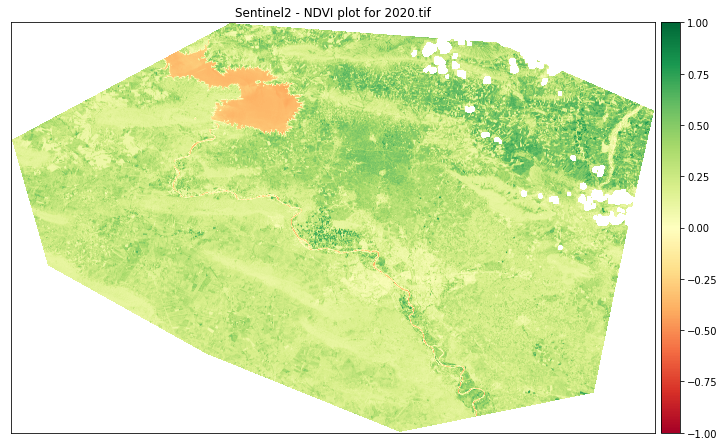

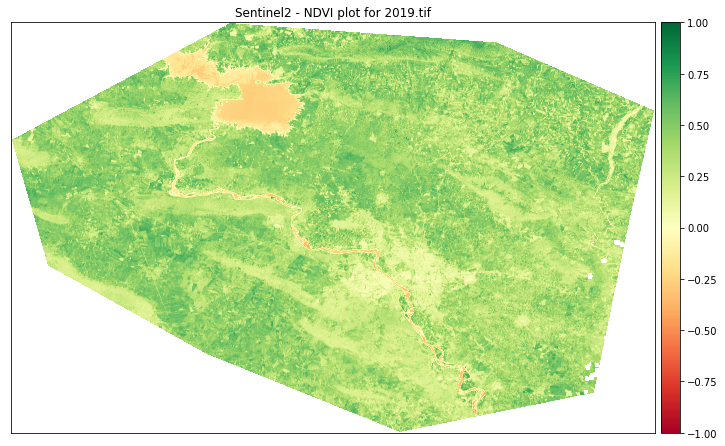

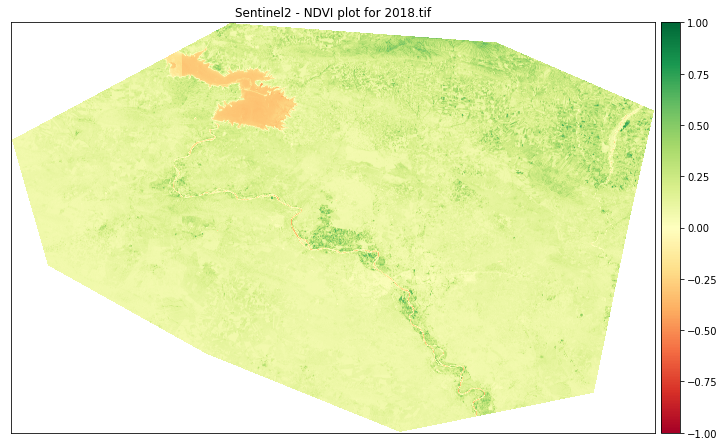

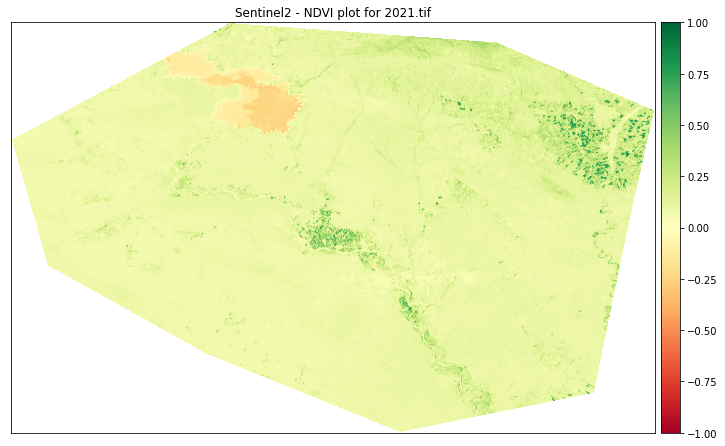

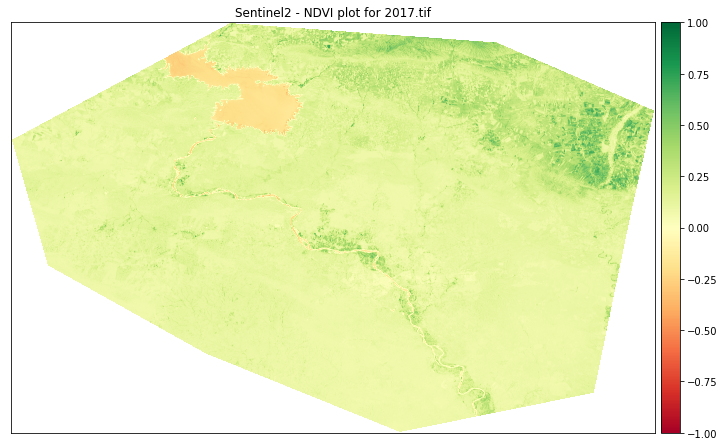

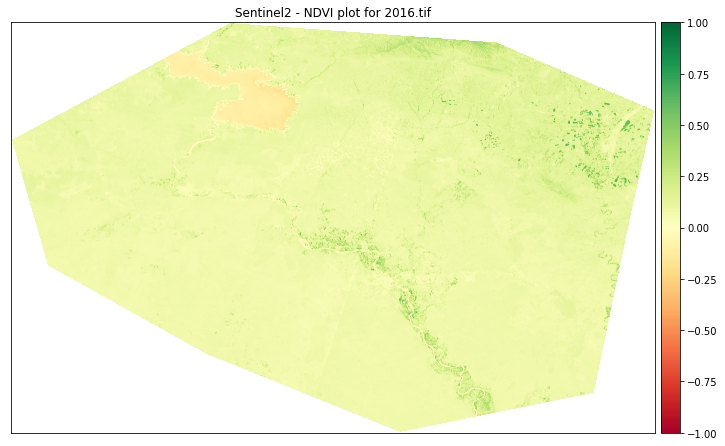

In [ ]:
#plot NDVI for all years
for root, __, files in os.walk(path):
  for file in files:
    if file.startswith('indices'):
      plot_ndvi(file)

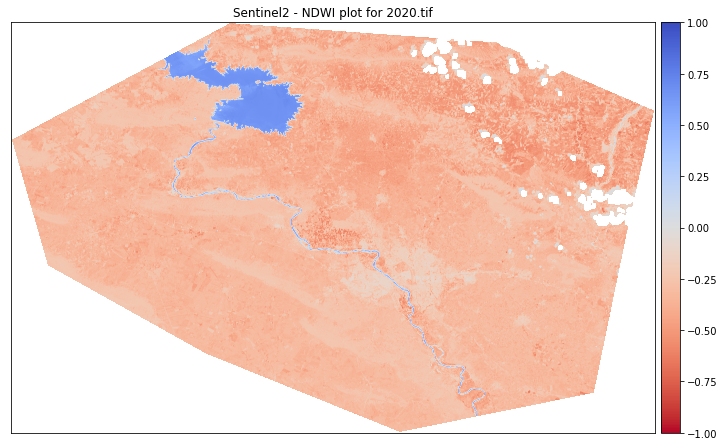

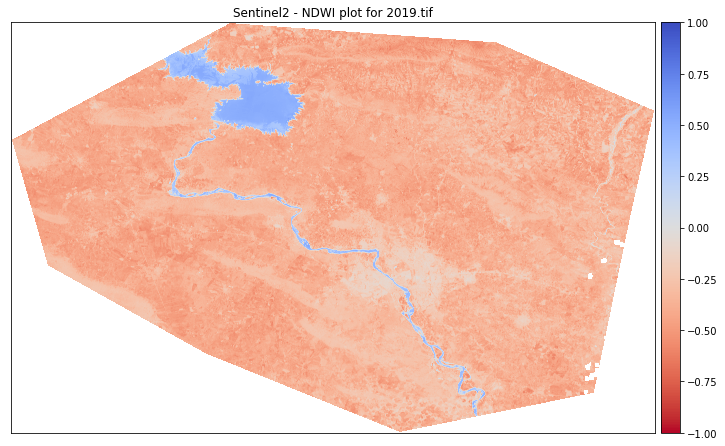

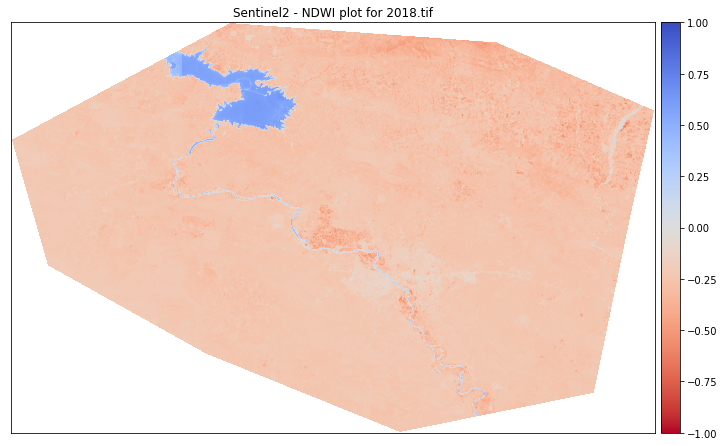

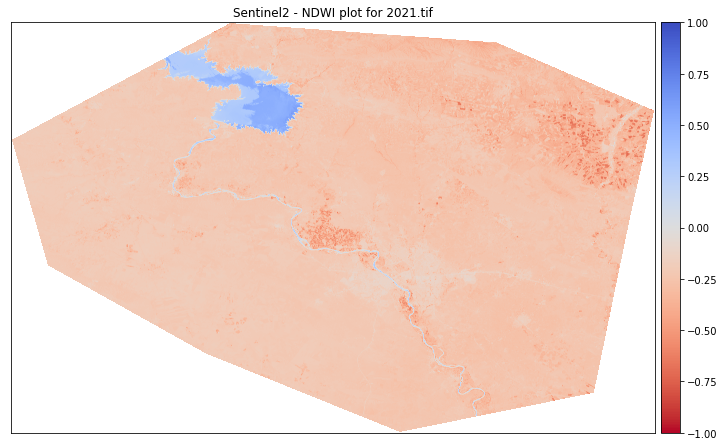

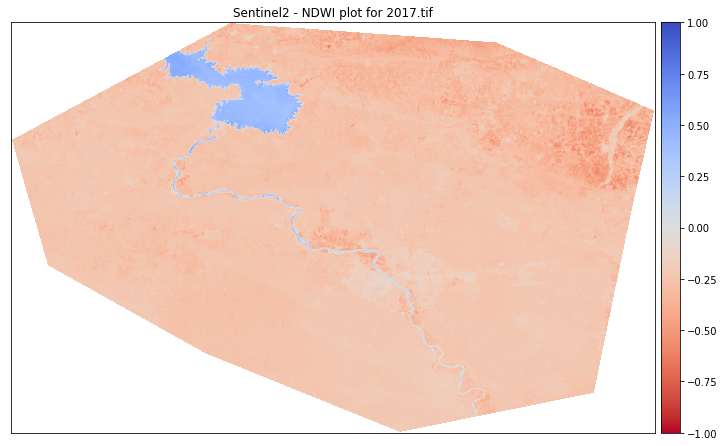

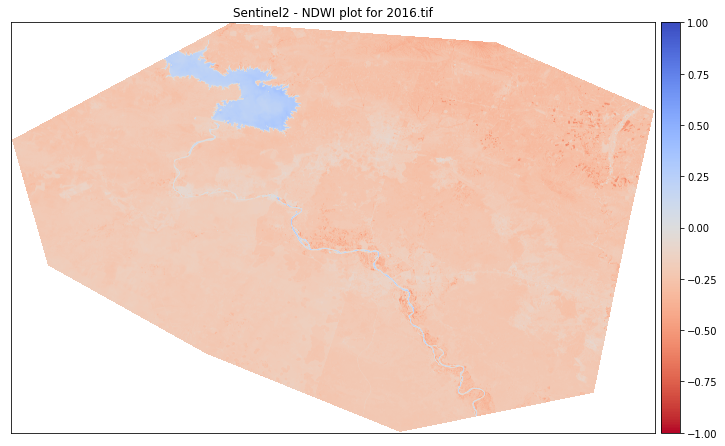

In [ ]:
#plot NDWI for all years
for root, __, files in os.walk(path):
  for file in files:
    if file.startswith('indices'):
      plot_ndwi(file)

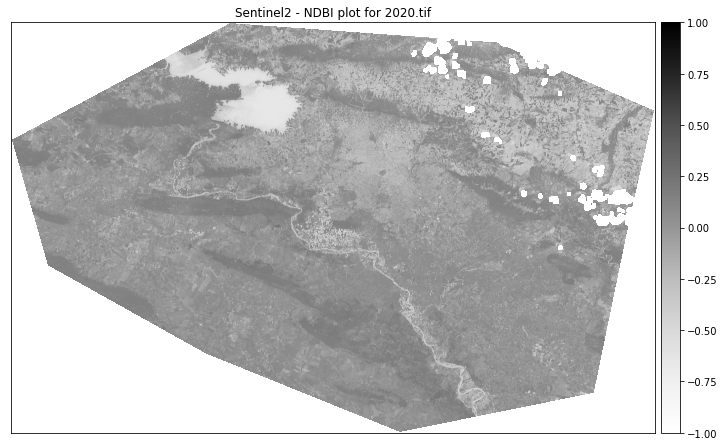

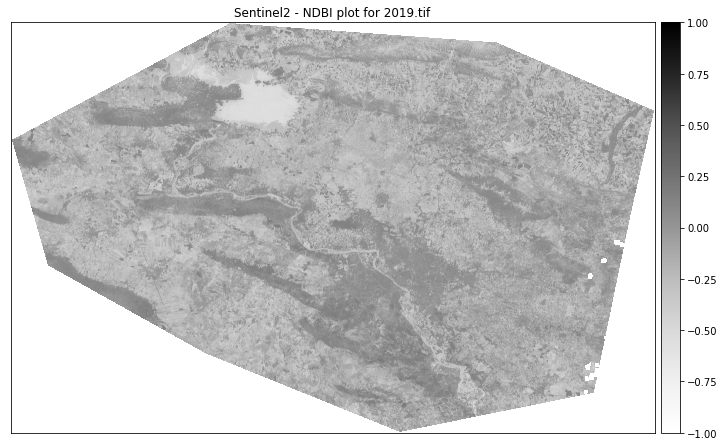

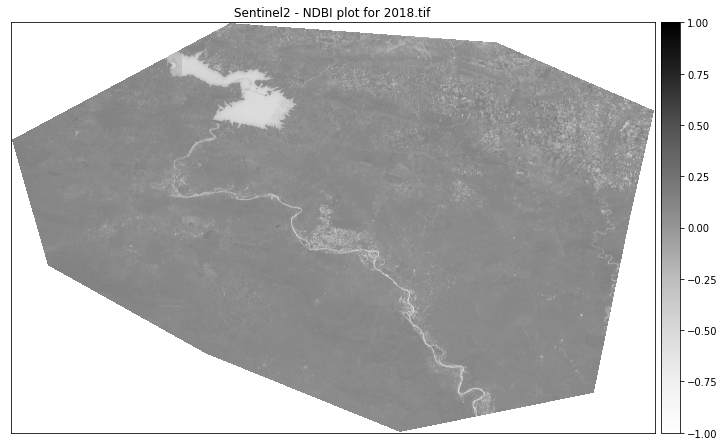

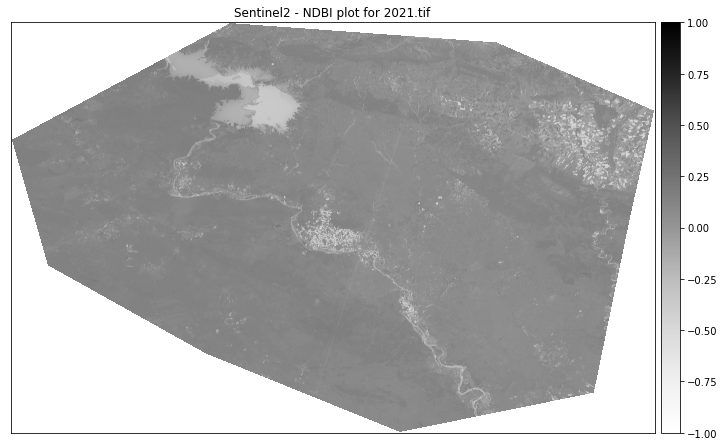

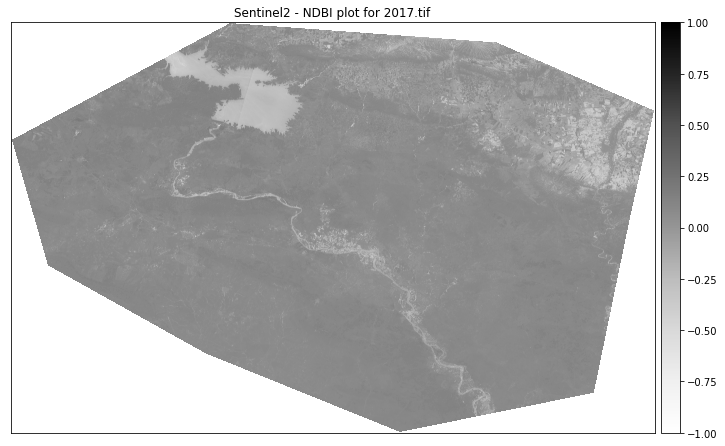

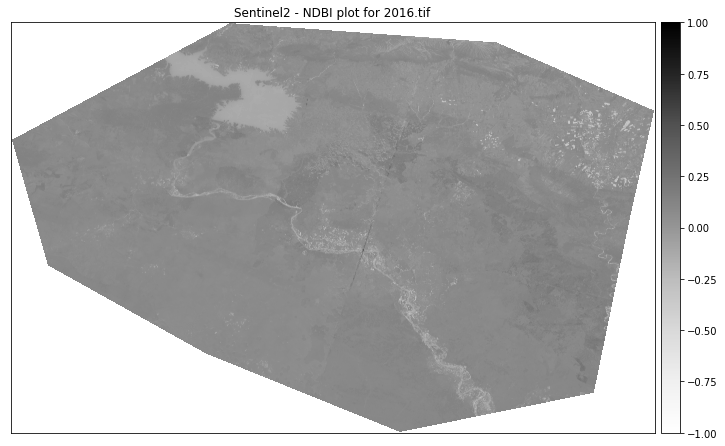

In [ ]:
#plot ndbi for all years
for root, __, files in os.walk(path):
  for file in files:
    if file.startswith('indices'):
      plot_ndbi(file)

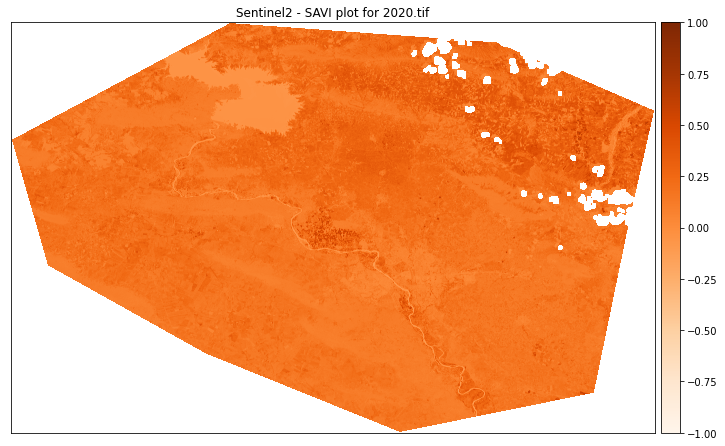

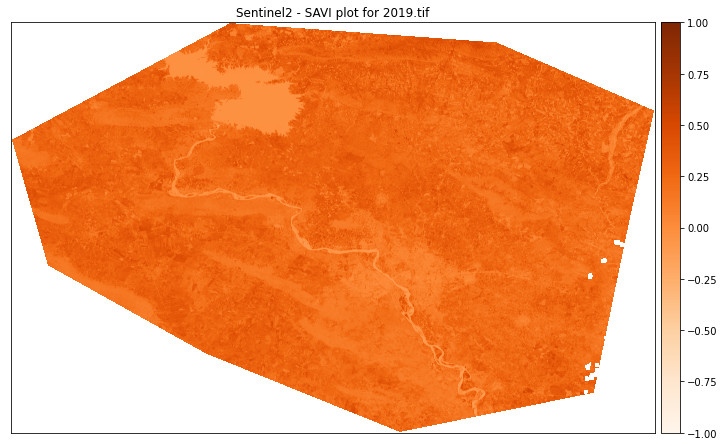

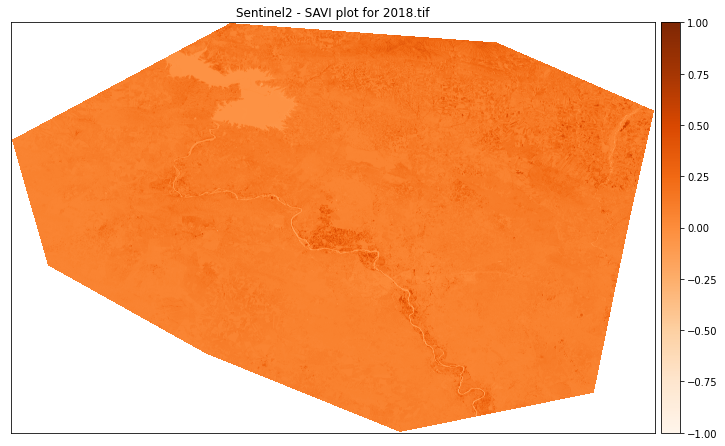

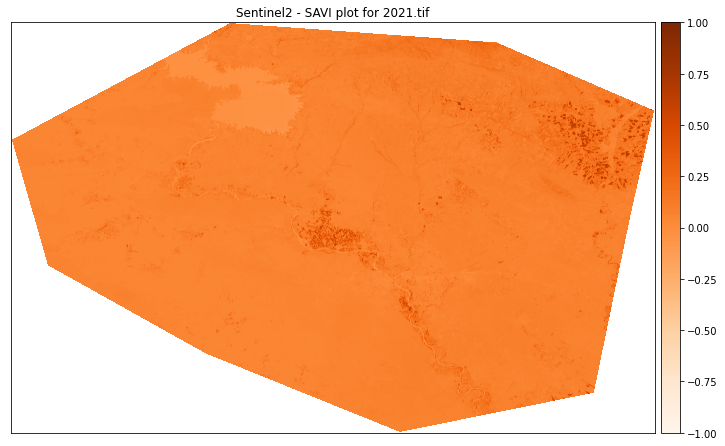

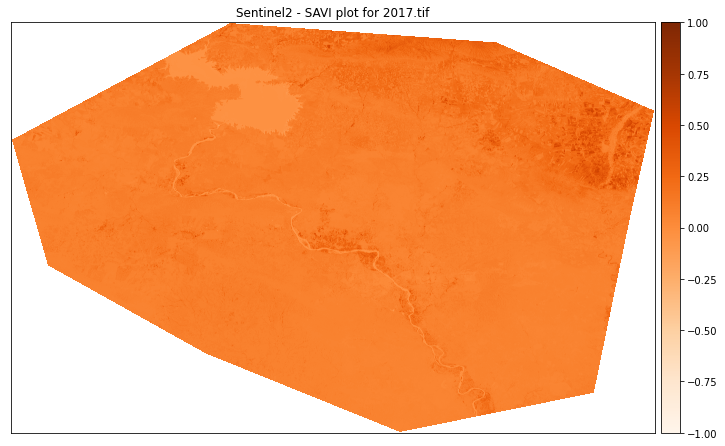

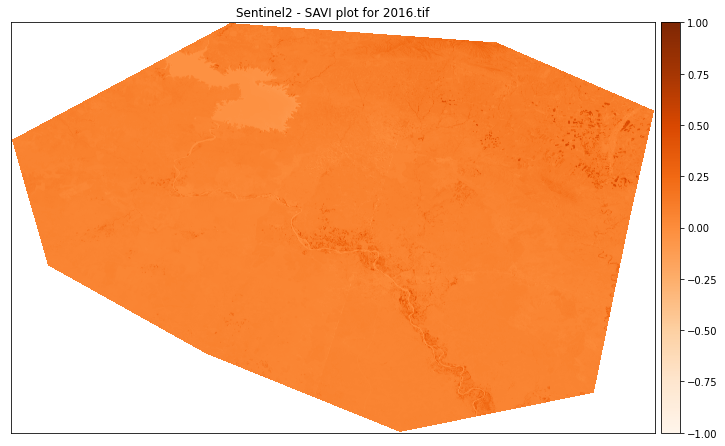

In [ ]:
#plot SAVI for all years
for root, __, files in os.walk(path):
  for file in files:
    if file.startswith('indices'):
      plot_savi(file)